# Exercise 3.2 - Solution


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2021-06-17 11:54:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv.1’

winequality-white.c 100%[===================>] 258.23K   496KB/s    in 0.5s    

2021-06-17 11:54:42 (496 KB/s) - ‘winequality-white.csv.1’ saved [264426/264426]



In [3]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

('data:', (4898, 12))
First example:
('Features:', array([5.9000e+00, 2.9000e-01, 1.6000e-01, 7.9000e+00, 4.4000e-02,
       4.8000e+01, 1.9700e+02, 9.9512e-01, 3.2100e+00, 3.6000e-01,
       9.4000e+00]))
('Quality:', 5.0)


# Solution

* First we want to understand the data better. Plot (`plt.hist`) the distribution of each of the features for the training data as well as the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality. Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature by itself seems most predictive for the quality?


('Feature:', 'fixed acidity')
('Correlation coefficient:', -0.12254069556587474)


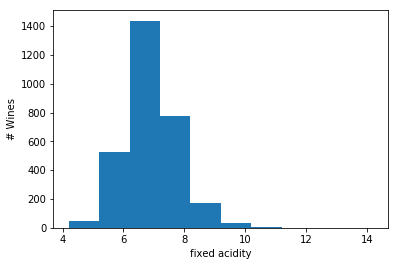

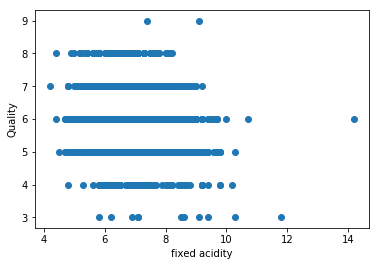

('Feature:', 'volatile acidity')
('Correlation coefficient:', -0.18705678684985722)


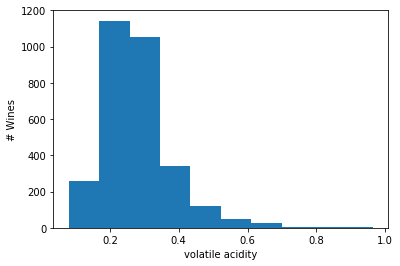

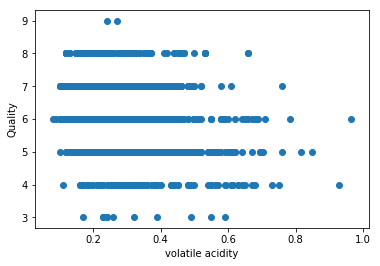

('Feature:', 'citric acid')
('Correlation coefficient:', -0.023930246358986624)


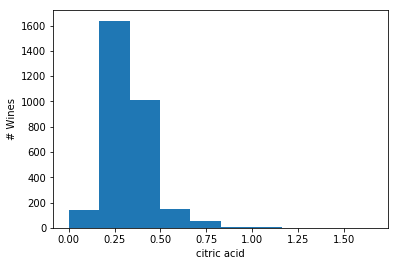

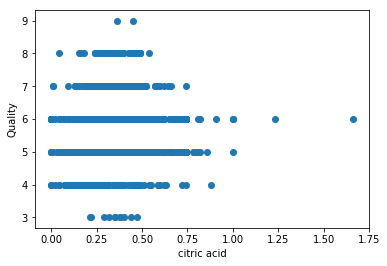

('Feature:', 'residual sugar')
('Correlation coefficient:', -0.105170907139558)


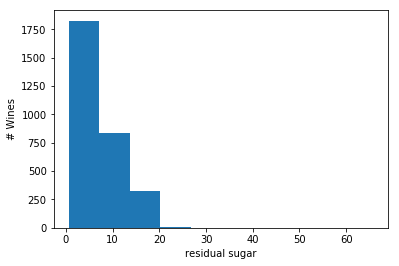

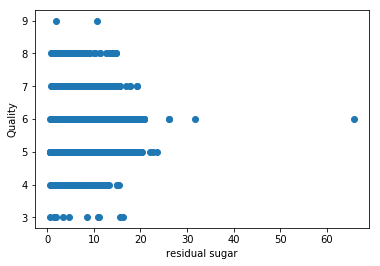

('Feature:', 'chlorides')
('Correlation coefficient:', -0.20983280019541595)


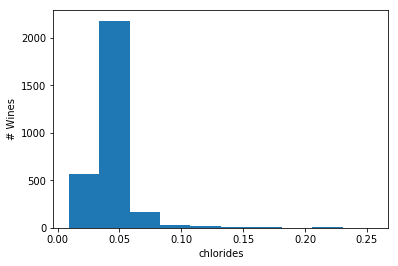

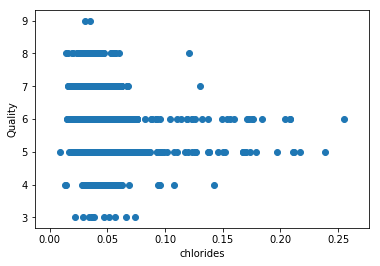

('Feature:', 'free sulfur dioxide')
('Correlation coefficient:', 0.03174244252877395)


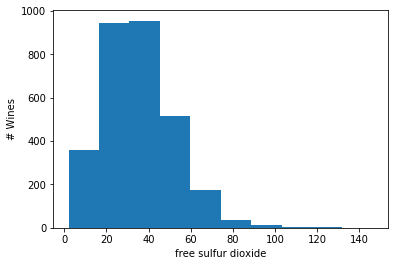

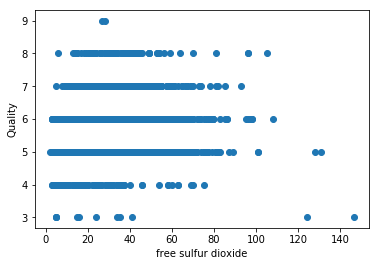

('Feature:', 'total sulfur dioxide')
('Correlation coefficient:', -0.1664347420545924)


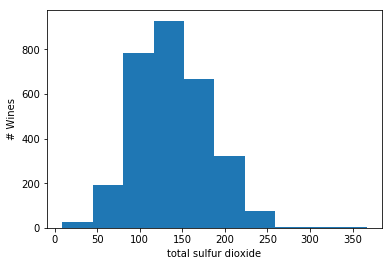

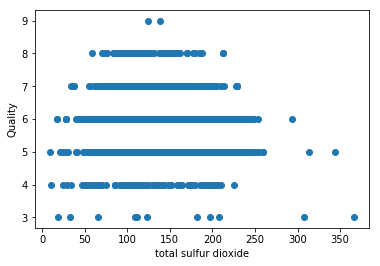

('Feature:', 'density')
('Correlation coefficient:', -0.3011834986297155)


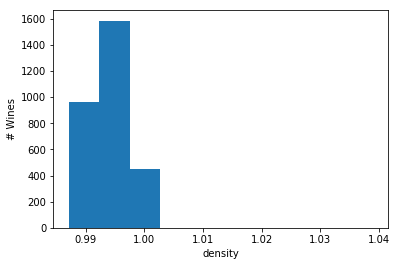

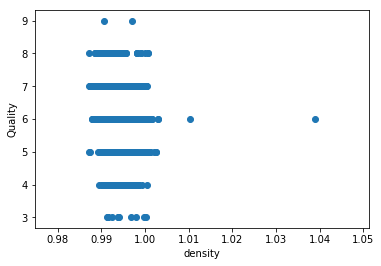

('Feature:', 'pH')
('Correlation coefficient:', 0.10582198539702228)


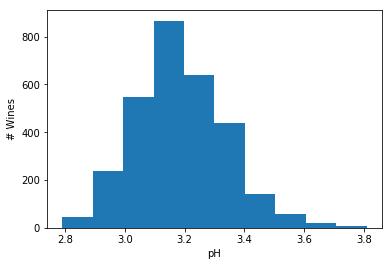

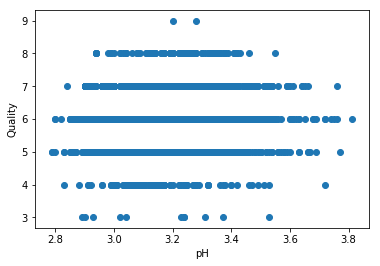

('Feature:', 'sulphates')
('Correlation coefficient:', 0.08806984058367662)


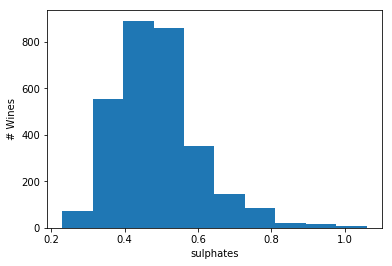

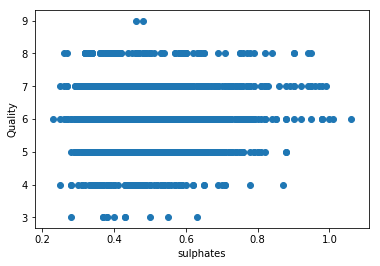

('Feature:', 'alcohol')
('Correlation coefficient:', 0.430906610759339)


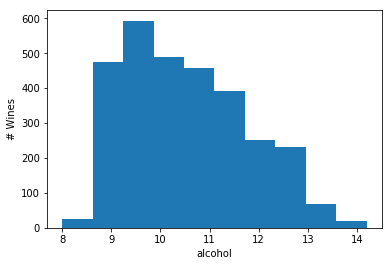

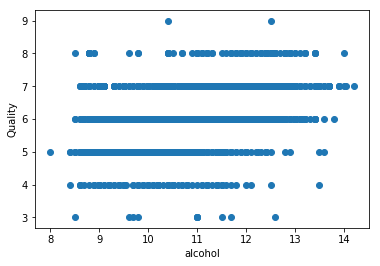

In [4]:
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print("Feature:", feat)
    print("Correlation coefficient:", 
          np.corrcoef(X_train[:,i_feat],y_train)[0,1]) # Calulate correlation coefficient

    # 1D Histogram 
    plt.hist(X_train[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()
    
    # Scatter Plot
    plt.scatter(X_train[:,i_feat],y_train)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()


* Calculate the linear regression weights. Numpy provides functions for matrix multiplication (`np.matmul`), matrix transposition (`.T`) and matrix inversion (`np.linalg.inv`).


In [5]:
# Calulate weights using train data
# w = (X_T X)^{-1} X_T y
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T),y_train)
print(w.shape)
print(w)


(11,)
[-5.30812726e-02 -1.97442032e+00 -1.19023323e-01  2.29172964e-02
 -1.24241078e+00  6.22941888e-03 -1.13065895e-03  2.01271384e+00
  1.73179624e-01  7.02324736e-01  3.58386901e-01]


* Use the weights to predict the quality for the test dataset. How
does your predicted quality compare with the true quality of the test data? Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

((1898, 11), (11,), (1898,))
[6.7000e+00 3.0000e-01 2.9000e-01 2.8000e+00 2.5000e-02 3.7000e+01
 1.0700e+02 9.9159e-01 3.3100e+00 6.3000e-01 1.1300e+01]
[-5.30812726e-02 -1.97442032e+00 -1.19023323e-01  2.29172964e-02
 -1.24241078e+00  6.22941888e-03 -1.13065895e-03  2.01271384e+00
  1.73179624e-01  7.02324736e-01  3.58386901e-01]
6.221376799160009
('Correlation coefficient:', 0.5089214775108005)


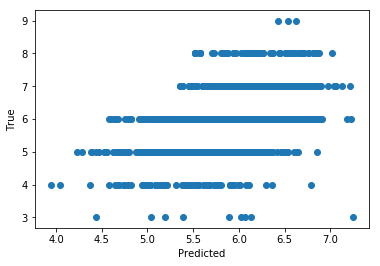

In [6]:
# Evaluate linear regression model 
y_pred = np.matmul(X_test,w)
print(X_test.shape,w.shape,y_pred.shape)

print(X_test[0])
print(w)
print(y_pred[0])


print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()